# Homework 2: Data Cleaning, EDA and Visualizations #

In [1]:
#import any libraries that you may need here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### We would like our new consultants and mentors to not just be technically skilled but also ethical leaders in their fields. Therefore, let us go over some basic data ethics knowledge. ###

## Section 1: Data Ethics

### What are the different types of biases we mentioned during lecture? Pick one that you observe in yourself and describe how it may influence your decision-making.

In [2]:
## Confirmation bias -- when you only observe and direct your attention to particular ideas/stats that fit your narrative of the world. An example of how it influences may daily deceision making is when I'm discussing current events with friends; My bias would make me only focus on my point of view instead of the other person's pov.

### How do you think you could overcome your biases? 

In [3]:
## To overcome confirmation bias, self-control and a general awareness of who I and my own actions is necessary. During conversations I should be more aware of what type of tone I'm projecting into the discussion and I should therefore act in a manner that pushes the discussion forward.

### What is one example of how unethical data analysis impacted a group of people? Avoid repeating the lecture example. 

In [4]:
## Exxon Valdez spill in 1989--Original estimates of the amount of oil spilled and the spread of the oil were faulty, resulting in less coordination then needed. As a resulted of the wrongful data analysis, hundreds of thousands of wildlife died and food from the sea remained contaminated for months.

## Section 2: Data Cleaning

### Pick out a dataset that you are interested in working with on [Kaggle](https://www.kaggle.com/datasets)! You should continue working with it in future homeworks so that you have a comprehensive data science project by the end of the semester so pick a good one.
### Download it and add it to the same folder that you are working in so that you are able to load it easily. You can refer to the [slides](https://docs.google.com/presentation/d/1UPj0F_I0CYoiUrbuSR9sYq50FEh8-RDG4usnTFaUBJI/edit#slide=id.g1c0cc4ea8d8_0_1369) that we used for onboarding for any help. ###

In [5]:
# load your dataset here, df is short for DataFrame. 
# E.g.You can use pd.read_csv() for csv files. 
df = pd.read_csv('NetflixOriginals.csv')

####  Example

In [6]:
elections = pd.read_csv("elections.csv")
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


### Now let's do some data cleaning! Here are a list of questions that you should think through and answer while looking at your data. If your data is from kaggle, it might already be really clean, but practise answering these questions. 

### *At this point, just answer these questions and examine your data but don't attempt to clean it yet* ###

- Does your data contain unrealistic or incorrect values?
    - Dates in the future
    - Locations that don’t exist
    - Negative counts
- Does your data violate obvious dependencies?
    - Age and birthday not matching
- Is the data coherent and consistent?
    - Misspellings and inconsistent labels
    - Was the data entered by hand?
- Are there signs of data falsification?
    - Repeated names, fake looking email addresses, uncommon names or fields
- Do we need to convert any of the variable types in order to prepare for modelling?
    - Qualitative variables that you might want to convert to numbers
- Any other interesting observations?

In [7]:
### Write your answers to each of the questions here 

# Q1: Does your data contain unrealistic or incorrect values?

# The data contains realistic values (all the scores already exist and the dates of the films are already made)

# Q2: Does your data violate obvious dependencies?

# The data doesn't violate any obvious dependencies!

# Q3: Is the data coherent and consistent?

# The data is indeed coherent

# Q4: Are there signs of data falsification?

# There appears to be no sign of data falsification

# Q5: Do we need to convert any of the variable types in order to prepare for modelling?

# We don't have to convery any variable types

# Q6: Any other interesting observations?

# It's a cool dataset!

In [8]:
# Any exploratory code here
# You can refer to the pandas section of the slides to do this
df.sort_values('Runtime', ascending = True)
df.sort_values('Language', ascending = True)

##average movie is 93.58 minutes long
average_time = sum(df['Runtime'])/len(df['Runtime'])

##range of movie length

##average score is 6.27
average_score = sum(df['IMDB Score'])/len(df['IMDB Score'])

### More factors to consider

Here is a list of a few more questions to consider while data cleaning! Answer them to get a deeper understanding of your data.

- Do any of the keys in each table reference each other?
    - Primary keys are the column or set of columns in a table that determine the values of the remaining columns
    - Foreign keys are the column or sets of columns that reference primary keys in other tables
    - Can we merge them tables?
- What does each field specify? 
    - What is the variable type? 
    - Qualitative(Ordinal and Nominal), Quantitative (Continuous and discrete)
    - String, integer, float, list, array etc.
- Granularity? What does each record represent? Are there aggregations?
- Where was this data collected from? What types of questions were asked to gather this data? How representative is it? When was it collected?
- Truncated data 
    - Check the platform that you are working on, does it limit your data size?
- Time zone inconsistencies
    - Convert to common timezone
- Duplicated records or fields -> eliminate carefully
- Spelling errors
- Units not specified or inconsistent
- Missing Data
- Redundant data
- Simplify 
    - Take one column
    - Combine multiple columns  into one
- Aggregation
    - groupby


In [9]:
### Your answers to each of the questions/ observations about each factor here 

# Q1: Do any of the keys in each table reference each other?

# A1: The keys in each table are generally independent of each other

## Addressing Missing Data/ Default Values

### As you cleaned your data, you may have observed missing data/ default values. Decide what to do with these values and explain your decision-making process.

Here are some methods to deal with missing values:
- Drop records with missing values
    - Check for biases induced by missing values - there may be trends in why something is missing
    - This requires domain knowledge to check for induced bias
- Imputation: Inferring missing values
    - Replace with average value (closest related subgroup mean)
    - Replace with a random value from the closest subgroup(Hot deck imputation) 
- Numerical: 
    - mean, mode, median
- Categorical
    - Mode, new category
- Directly model missing values during future analysis

In [10]:
##basic data cleaning -- dropped values that were duplicated and not availble so that they don't interfere with other functions and analysis down the line
df = df.dropna().drop_duplicates()

In [11]:
#Code addressing missing values here e.g. df.dropna()
df.dropna().head(5) #remove this line, this is just an example

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [12]:
#Explain what types of missing values you found and the decisions you made in addressing them

##since the data set was already cleaned before hand, no values were dropped

## Handling outliers

### Now let's handle any outliers. Same process as before!

Here are some methods to deal with handling outliers:
- Drop records with outliers
    - Check for biases induced by missing values - there may be trends in why something is missing
    - This requires domain knowledge to check for induced bias
- Replace, as with Inferring missing values
    - Typically with min or max
- Binning
    - E.g. greater than 5

In [13]:
## get rid of outliers via IQR
q1 = np.percentile(df['Runtime'], 25)
 
q3 = np.percentile(df['Runtime'], 75)
IQR = q3 - q1

upper_bound = q3 + 1.5*IQR
lower_bound = q1 - 1.5*IQR

df = df.loc[(df['Runtime'] < upper_bound) | (df['Runtime'] > lower_bound)]

In [14]:
#found outliers in the runtime via using the IQR and the data's upper and lower bounds; I removed them

## Let's clean!

### Now that we have a much deeper understanding of our data and have dealt with a few preliminary issues, clean up the data so that it is useful and accurate!  

In [15]:
df = df.dropna().drop_duplicates()

##dropped na and duplicate values

## Section 3: EDA 

### Study the data and observe any potential trends/ consider models that you might be able to implement. Study the relationships between the different columns and see if you can find any insights. List at least 2 potential project ideas.

In [16]:
getting_correlation = df.corr(method='pearson')

df.groupby('Genre').mean()

##idea 1: look at the correlation between teh release times (year, month, day) and the movie's IMDB SCORE

##idea 2: look at the language the movie is in and their runtime

##idea 3: look at genre and each genre's avg IMDB score

,Runtime,IMDB Score
Genre,,
Action,108.000000,5.414286
Action comedy,101.200000,5.420000
Action thriller,82.000000,6.400000
Action-adventure,121.000000,7.300000
Action-thriller,119.666667,6.133333
...,...,...
War,110.500000,6.750000
War drama,145.500000,7.100000
War-Comedy,122.000000,6.000000


# Section 4: Visualizations

### This is also part of EDA! The whole process is rather cyclical. For this part, make 3 visualizations and describe what you see. 

### Then, make 2 out of 3 these visualizations.
### 1. Heat Map
### 2. KDE Plot
### 3. Box Plot

### So in total, you should have made 5 visualizations.

In [17]:
#viz 1 -- histogram

import plotly.express as px
fig = px.histogram(df, x="IMDB Score")
fig.show()

##appears slightly normally distributed and left skew

In [18]:
#viz 2 - line chart

fig = px.line(df, x="Runtime")
fig.show()


##looks like the runtime's all over the place!

In [19]:
#Visualization 3 - bar chart

fig = px.bar(df, x='Genre', y='IMDB Score')
fig.show()

#appears that there's a overwhelming majority of documentarys and dramas

<AxesSubplot: xlabel='Runtime', ylabel='Density'>

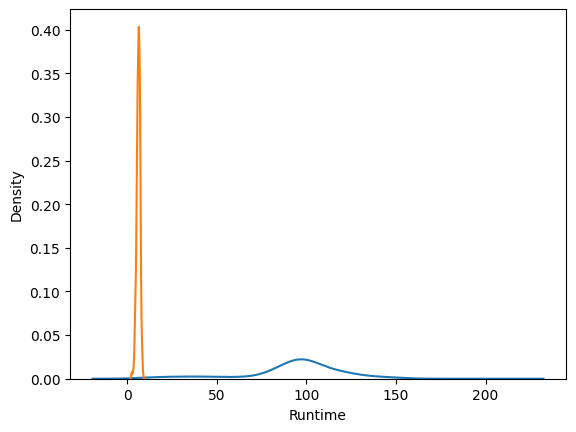

In [20]:
#viz 4 - KDE Plot

sns.kdeplot(df['Runtime'])
sns.kdeplot(df['IMDB Score'])


#kde plot shows that there's not much similarities between the runtime and score variables when they're plottedo n the same runtime

In [21]:
#viz 5 - heatmap

fig = px.imshow(df)
fig.show()


#show there's not much correlations between the runtime and imdb score variable

### Which visualization is the best for your dataset and why?

In [22]:
#best vizualization for my dataset would probably be either the bar charts or histograms because they quickly and accuratly demonstrate the relationships between their own variables and other variables

# Good job!

### As a quick wrap-up, think about how your biases might have affected your judgement and if there is anything you want to work on. 

### As you can see, working with a dataset outside of class is much less structured. However, with practice, you will be become much sharper and efficient at wrangling data. Good luck with the next project!

In [23]:
#Biases present may include confirmation bias after I completed my first set of EDA; Wanting to see that a relationship between 2 variables, I may have cleaned my data excssivly to the point where I forced the relationship between the IMDB scores and runtime to occur

### Fantastic job ~ Remember to push all your changes your GitHub repository and submit on Gradescope.
### Thank you for your time :)
### That's all for this homework! 